In [82]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

import qiime2 as q2

%matplotlib inline

# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'project_data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

In [83]:
df_meta = pd.read_csv(f'{data_dir}/cleaned_sample_meta_data.tsv', sep='\t',index_col=0)
df_meta.head()

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
6,10317.000046,60s,68.0,Normal,24.12,False,2016-05-10 10:00:00,United Kingdom,False,22.9,...,Never,Rarely,Regularly,Occasionally,Occasionally,Daily,Never,Never,Rarely,Rarely
9,10317.000051,40s,46.0,Normal,22.60,False,2016-05-23 10:05:00,USA,False,261.1,...,Rarely,Occasionally,Regularly,Occasionally,Rarely,Regularly,Occasionally,Never,Occasionally,Regularly


Filter out the columns about Nutrition(NUT):

In [84]:
names=df_meta.columns
NUT_INDEX = names[df_meta.columns.str.contains('NUT')]

df_NUT = df_meta[NUT_INDEX]
df_NUT.head()

,NUT_alcohol_consumption,NUT_alcohol_frequency,NUT_alcohol_types_beercider,NUT_alcohol_types_red_wine,NUT_alcohol_types_sour_beers,NUT_alcohol_types_spiritshard_alcohol,NUT_alcohol_types_unspecified,NUT_alcohol_types_white_wine,NUT_artificial_sweeteners,NUT_diet_type,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
1,False,Not provided,True,False,False,False,False,False,Never,Omnivore,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,True,Regularly,True,False,False,False,False,False,Rarely,Omnivore,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,False,Never,False,False,False,False,True,False,Never,Omnivore,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
6,True,Daily,True,False,False,False,False,False,Never,Omnivore,...,Never,Rarely,Regularly,Occasionally,Occasionally,Daily,Never,Never,Rarely,Rarely
9,True,Regularly,True,False,False,False,False,True,Occasionally,Omnivore,...,Rarely,Occasionally,Regularly,Occasionally,Rarely,Regularly,Occasionally,Never,Occasionally,Regularly


In [85]:
names_NUT = df_NUT.columns.tolist()

### Extract data

In [87]:
#Extract not data containing alcohol consumption info

names_NUT = df_NUT.columns
NUT_INDEX = names_NUT[~df_NUT.columns.str.contains('lcohol')]
df_NUT_nonALC = df_meta[NUT_INDEX]
df_NUT_nonALC.head()

,NUT_artificial_sweeteners,NUT_diet_type,NUT_drinks_per_session,NUT_fed_as_infant,NUT_fermented_plant_frequency,NUT_frozen_dessert_frequency,NUT_fruit_frequency,NUT_gluten,NUT_high_fat_red_meat_frequency,NUT_homecooked_meals_frequency,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
1,Never,Omnivore,Not provided,Primarily breast milk,Rarely,Rarely,Occasionally,No,Rarely,Regularly,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,Rarely,Omnivore,Not provided,Not sure,Rarely,Never,Occasionally,No,Rarely,Regularly,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,Never,Omnivore,Not provided,A mixture of breast milk and formula,Occasionally,Never,Regularly,No,Rarely,Occasionally,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
6,Never,Omnivore,Not provided,Primarily breast milk,Never,Rarely,Regularly,No,Rarely,Regularly,...,Never,Rarely,Regularly,Occasionally,Occasionally,Daily,Never,Never,Rarely,Rarely
9,Occasionally,Omnivore,Not provided,Primarily infant formula,Rarely,Rarely,Daily,I do not eat gluten because it makes me feel bad,Rarely,Regularly,...,Rarely,Occasionally,Regularly,Occasionally,Rarely,Regularly,Occasionally,Never,Occasionally,Regularly


In [88]:
#Extract eating habits including alcohol

INDEX_ALC = names[df_meta.columns.str.contains('lcohol')]
df_ALC = df_NUT[INDEX_ALC]
df_ALC.head()

,NUT_alcohol_consumption,NUT_alcohol_frequency,NUT_alcohol_types_beercider,NUT_alcohol_types_red_wine,NUT_alcohol_types_sour_beers,NUT_alcohol_types_spiritshard_alcohol,NUT_alcohol_types_unspecified,NUT_alcohol_types_white_wine
1,False,Not provided,True,False,False,False,False,False
2,True,Regularly,True,False,False,False,False,False
3,False,Never,False,False,False,False,True,False
6,True,Daily,True,False,False,False,False,False
9,True,Regularly,True,False,False,False,False,True


### Check eating habits

<Figure size 432x288 with 0 Axes>

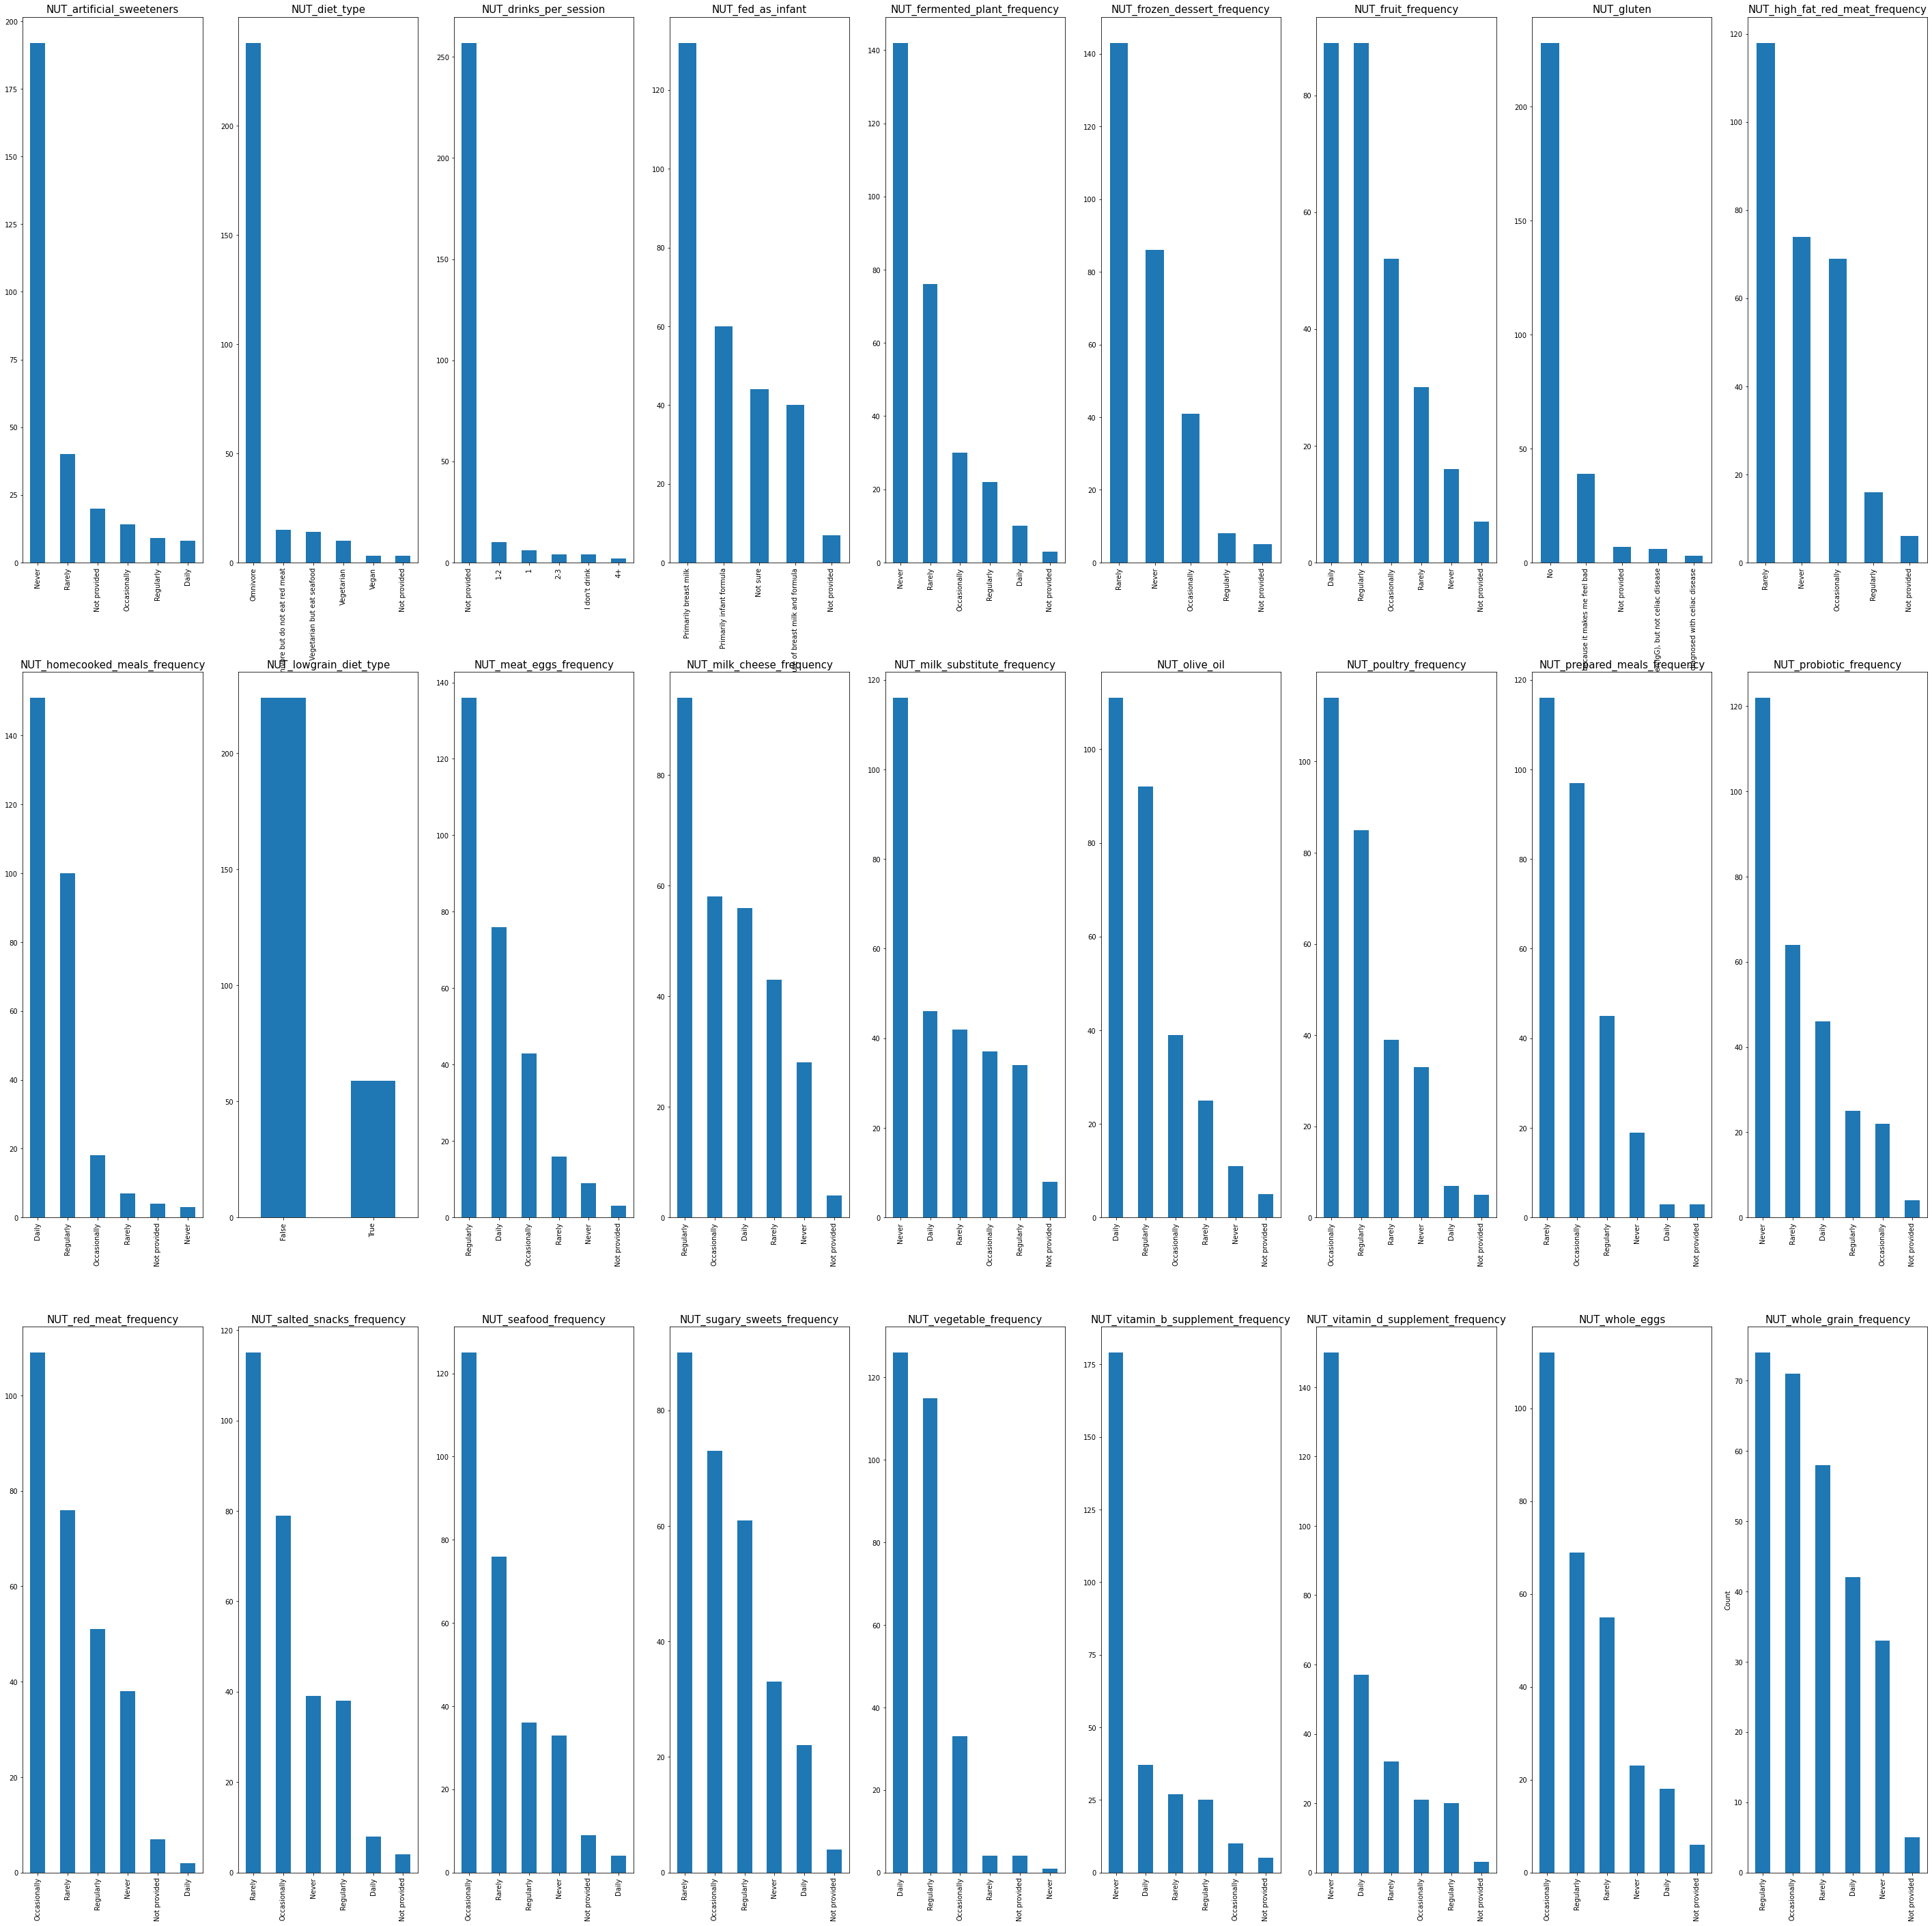

<Figure size 432x288 with 0 Axes>

In [95]:
#Plots not containing data about alcohol consumption
fig, axes = plt.subplots(nrows=3, ncols=9, figsize=(50, 50))
b = -1
for i in range(3):
    for j in range(9):
        b += 1
        df_NUT_nonALC[df_NUT_nonALC.columns[b]].value_counts().plot(ax=axes[i,j],kind='bar')
        axes[i,j].set_title(df_NUT_nonALC.columns[b], fontsize=15)
        plt.ylabel('Count')
        
plt.figure()

In [42]:
df_meta.columns.tolist()

['sampleid',
 'GEN_age_cat',
 'GEN_age_corrected',
 'GEN_bmi_cat',
 'GEN_bmi_corrected',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_elevation',
 'GEN_geo_loc_name',
 'GEN_height_cm',
 'GEN_host_common_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_latitude',
 'GEN_level_of_education',
 'GEN_longitude',
 'GEN_race',
 'GEN_sample_type',
 'GEN_sex',
 'GEN_weight_kg',
 'NUT_alcohol_consumption',
 'NUT_alcohol_frequency',
 'NUT_alcohol_types_beercider',
 'NUT_alcohol_types_red_wine',
 'NUT_alcohol_types_sour_beers',
 'NUT_alcohol_types_spiritshard_alcohol',
 'NUT_alcohol_types_unspecified',
 'NUT_alcohol_types_white_wine',
 'NUT_artificial_sweeteners',
 'NUT_diet_type',
 'NUT_drinks_per_session',
 'NUT_fed_as_infant',
 'NUT_fermented_plant_frequency',
 'NUT_frozen_dessert_frequency',
 'NUT_fruit_frequency',
 'NUT_gluten',
 'NUT_high_fat_red_meat_frequency',
 'NUT_homecooked_meals_frequency',
 'NUT_lowgrain_diet_type',
 'NUT_meat_eggs_frequency',
 'NUT_mil

First we check the Alcohol consumption frequency.

Text(0, 0.5, 'Count')

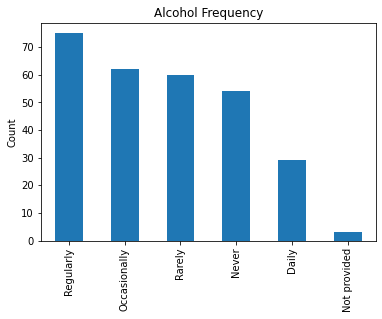

In [96]:
df_ALC['NUT_alcohol_frequency'].value_counts().plot(kind='bar')
plt.title('Alcohol Frequency')
plt.ylabel('Count')

In [97]:
df_ALC = df_ALC.drop('NUT_alcohol_frequency', axis=1)

To get an general overview over the alcohol habits in our dataset we count the corresponding occurances.

In [98]:
counts = []
for column in df_ALC.columns:
    c=df_ALC[column].value_counts()[True]
    counts.append(c)

In [99]:
col = df_ALC.columns

In [100]:
df = pd.DataFrame({'Counts': counts},  col)
df

,Counts
NUT_alcohol_consumption,226
NUT_alcohol_types_beercider,134
NUT_alcohol_types_red_wine,172
NUT_alcohol_types_sour_beers,20
NUT_alcohol_types_spiritshard_alcohol,89
NUT_alcohol_types_unspecified,59
NUT_alcohol_types_white_wine,115


Text(0, 0.5, 'Count')

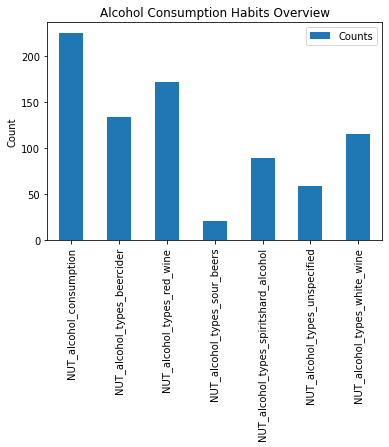

In [101]:
df.plot(kind='bar')
plt.title('Alcohol Consumption Habits Overview')
plt.ylabel('Count')